In [1]:
from sklearn.datasets import load_diabetes

In [3]:
X, y = load_diabetes(return_X_y=True)

In [15]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression

In [17]:
model = KNeighborsRegressor()
linear = LinearRegression()

In [18]:
model.fit(X, y)
linear.fit(X,y)

LinearRegression()

In [19]:
predictions = model.predict(X)
linear_predictions = model.predict(X)

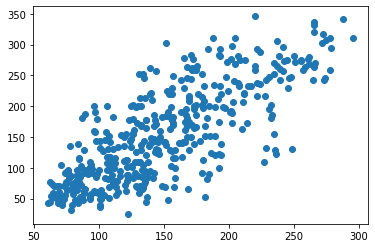

In [21]:
import matplotlib.pyplot as plt
plt.scatter(predictions, y)

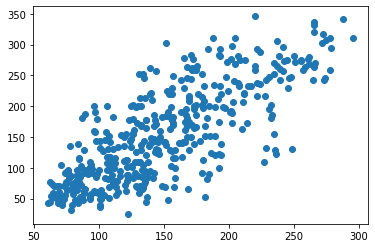

In [23]:
plt.scatter(linear_predictions, y)

In [26]:
X[0]

array([ 0.03807591,  0.05068012,  0.06169621,  0.02187235, -0.0442235 ,
       -0.03482076, -0.04340085, -0.00259226,  0.01990842, -0.01764613])

In [27]:
y[0]

151.0

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline

pipe = Pipeline([
    ('scale', StandardScaler()),
    ('model', KNeighborsRegressor(n_neighbors=1))
])

In [37]:
pipe.fit(X,y)

Pipeline(steps=[('scale', StandardScaler()),
                ('model', KNeighborsRegressor(n_neighbors=1))])

In [38]:
pipe_preds = pipe.predict(X)

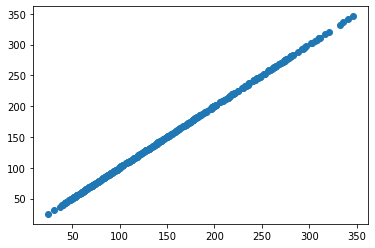

In [39]:
plt.scatter(pipe_preds, y)

In [40]:
from sklearn.model_selection import GridSearchCV

In [41]:
pipe.get_params()

{'memory': None,
 'steps': [('scale', StandardScaler()),
  ('model', KNeighborsRegressor(n_neighbors=1))],
 'verbose': False,
 'scale': StandardScaler(),
 'model': KNeighborsRegressor(n_neighbors=1),
 'scale__copy': True,
 'scale__with_mean': True,
 'scale__with_std': True,
 'model__algorithm': 'auto',
 'model__leaf_size': 30,
 'model__metric': 'minkowski',
 'model__metric_params': None,
 'model__n_jobs': None,
 'model__n_neighbors': 1,
 'model__p': 2,
 'model__weights': 'uniform'}

In [49]:
grid_mod = GridSearchCV(estimator=pipe, 
             param_grid={'model__n_neighbors': list(range(1,11))},
             cv=3
            )

In [50]:
grid_mod.fit(X,y)

GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('scale', StandardScaler()),
                                       ('model',
                                        KNeighborsRegressor(n_neighbors=1))]),
             param_grid={'model__n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]})

In [53]:
import pandas as pd

In [55]:
pd.DataFrame(grid_mod.cv_results_)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_model__n_neighbors,params,split0_test_score,split1_test_score,split2_test_score,mean_test_score,std_test_score,rank_test_score
0,0.002914,0.002091,0.004541,0.002866,1,{'model__n_neighbors': 1},0.105976,0.124092,-0.158523,0.023849,0.129168,10
1,0.002279,0.001681,0.002659,0.001941,2,{'model__n_neighbors': 2},0.268889,0.339379,0.264563,0.290944,0.034295,9
2,0.001783,0.001409,0.004904,0.002811,3,{'model__n_neighbors': 3},0.333057,0.382744,0.356899,0.357567,0.020290,8
3,0.000000,0.000000,0.007578,0.000711,4,{'model__n_neighbors': 4},0.342407,0.404701,0.409910,0.385673,0.030668,6
4,0.000816,0.001155,0.004164,0.003962,5,{'model__n_neighbors': 5},0.358865,0.377198,0.412549,0.382871,0.022280,7
5,0.000000,0.000000,0.000000,0.000000,6,{'model__n_neighbors': 6},0.372665,0.389923,0.436389,0.399659,0.026911,5
6,0.000000,0.000000,0.008452,0.000402,7,{'model__n_neighbors': 7},0.412584,0.393681,0.446147,0.417471,0.021696,4
7,0.000000,0.000000,0.008008,0.000014,8,{'model__n_neighbors': 8},0.414478,0.409779,0.485850,0.436702,0.034806,3
8,0.000000,0.000000,0.007989,0.000016,9,{'model__n_neighbors': 9},0.414191,0.412035,0.528462,0.451563,0.054383,2
9,0.008449,0.000635,0.001090,0.001542,10,{'model__n_neighbors': 10},0.408989,0.405303,0.544371,0.452888,0.064706,1


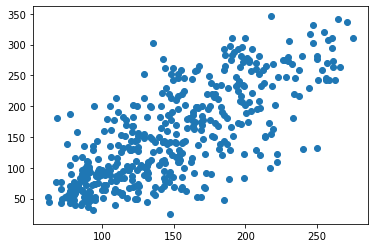

In [58]:
grid_preds = grid_mod.predict(X)
plt.scatter(grid_preds, y)